In [2]:
import pandas
import sklearn
import numpy

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib

In [3]:
filename = "/Users/simondi/PHD/data/data/target_infect_x/screening_data_subset/cells_sample_10_normalized.tsv"

In [4]:
data = pandas.read_csv(filename, sep="\t", header=0)

In [5]:
feature_cols = [(i, x) for i, x in enumerate(data.columns.values) if x.startswith("cells")]
for i, c in feature_cols:
    data.loc[:, c] = data.loc[:, c].astype('float64')

In [6]:
grops = ['pathogen', 'library', 'design', 'replicate', 'gene']

In [7]:
grop_cnt = data.query("design=='p' and library=='d' and replicate==1 and study=='infectx'").groupby("gene").size()

In [8]:
#data.query("design=='p' and library=='d' and replicate==1 and study=='infectx'").groupby("gene").filter(lambda x: len(x) >= 40).groupby("gene").size()

In [9]:
data_new = data.query("library=='d' and design=='p' and replicate==1 and (pathogen=='brucella' or pathogen=='listeria' or pathogen=='adeno' or pathogen=='bartonella')").groupby(["gene"]).filter(lambda x: len(x) == 40)

In [10]:
data_new.loc[numpy.isnan(data_new["cells.children_invasomes_count"])].groupby("pathogen").size()

pathogen
adeno       155620
brucella    155620
listeria    155620
dtype: int64

In [11]:
data_new.loc[numpy.isfinite(data_new["cells.children_invasomes_count"])].groupby("pathogen").size()

pathogen
bartonella    155620
dtype: int64

In [12]:
del data_new["cells.children_invasomes_count"]
del data_new["cells.children_bacteria_count"]

In [13]:
feature_cols_idxs = [ x for x in data_new.columns.values if x.startswith("cells")]
feature_cols_idxs
X = data_new.dropna()
#data_new[numpy.isfinite(data_new.loc[:, feature_cols_idxs]) | numpy.isnan(data_new[:, feature_cols_idxs])]

In [17]:
X[1:5]

,Unnamed: 0,study,pathogen,library,design,replicate,plate,well,gene,sirna,...,cells.location_center_y,cells.neighbors_anglebetweenneighbors_2,cells.neighbors_firstclosestobjectnumber_2,cells.neighbors_firstclosestxvector_2,cells.neighbors_firstclosestyvector_2,cells.neighbors_numberofneighbors_2,cells.neighbors_secondclosestobjectnumber_2,cells.neighbors_secondclosestxvector_2,cells.neighbors_secondclosestyvector_2,cells.parent_nuclei
19190,19190,group_cossart,listeria,d,p,1,dz10-1k,a03,ptdss1,l-008568-00,...,0.746405,0.784279,2.040954,-0.169644,-1.082033,-0.683946,1.990027,-0.366199,0.801289,2.083792
19191,19191,group_cossart,listeria,d,p,1,dz10-1k,a03,ptdss1,l-008568-00,...,-0.059350,0.350490,-1.453904,-0.416235,-1.104777,-0.181487,-1.263154,0.974851,0.220525,-1.375597
19192,19192,group_cossart,listeria,d,p,1,dz10-1k,a03,ptdss1,l-008568-00,...,1.315325,-0.868585,1.366819,-0.374024,-0.895257,0.823431,1.474496,0.791894,-0.699153,1.395444
19193,19193,group_cossart,listeria,d,p,1,dz10-1k,a03,ptdss1,l-008568-00,...,1.239130,-0.155559,0.639463,-0.329358,-1.296968,0.823431,0.514541,-0.927066,0.520524,0.689446


In [14]:
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

In [230]:
#X.dropna(axis=0, how='any')

,cells.areashape_area,cells.areashape_eccentricity,cells.areashape_extent,cells.areashape_formfactor,cells.areashape_majoraxislength,cells.areashape_minoraxislength,cells.areashape_perimeter,cells.location_center_x,cells.location_center_y,cells.neighbors_anglebetweenneighbors_2,cells.neighbors_firstclosestobjectnumber_2,cells.neighbors_firstclosestxvector_2,cells.neighbors_firstclosestyvector_2,cells.neighbors_numberofneighbors_2,cells.neighbors_secondclosestobjectnumber_2,cells.neighbors_secondclosestxvector_2,cells.neighbors_secondclosestyvector_2,cells.parent_nuclei
19189,-0.406652,0.843104,0.038704,-0.132794,0.000492,-0.578482,-0.367381,1.134215,1.419943,-1.587547,1.810329,0.499172,0.673442,0.320972,1.652265,-0.122069,1.142655,1.624893
19190,-0.858659,0.878656,0.778243,0.684690,-0.526492,-1.048000,-0.865664,1.681028,0.746405,0.784279,2.040954,-0.169644,-1.082033,-0.683946,1.990028,-0.366199,0.801289,2.083792
19191,-0.586906,-2.583344,-0.355602,-0.634200,-0.857479,0.317278,-0.230283,-1.616175,-0.059350,0.350490,-1.453904,-0.416235,-1.104777,-0.181487,-1.263154,0.974851,0.220525,-1.375597
19192,-0.455288,0.314471,0.623119,-0.586907,-0.449938,-0.428672,-0.166453,1.323963,1.315325,-0.868585,1.366819,-0.374024,-0.895257,0.823431,1.474496,0.791894,-0.699153,1.395444
19193,-0.164299,0.325186,0.962828,0.904502,-0.171741,-0.153802,-0.565356,0.317323,1.239130,-0.155559,0.639463,-0.329358,-1.296968,0.823431,0.514541,-0.927066,0.520525,0.689446
19194,0.840833,-0.810253,0.217411,-0.474355,0.193991,1.159291,0.470330,-1.186941,1.018902,1.431668,-0.992654,-1.288298,-1.197770,0.823431,-0.694292,1.010994,1.156246,-0.828449
19195,-0.166772,0.340388,-0.961940,-1.002671,0.022324,0.028913,0.400511,1.047813,-1.015643,0.292664,0.994271,-0.496163,1.014964,-0.181487,1.296726,1.258625,-0.149059,1.060095
19196,2.531257,-1.152262,0.261338,0.336361,1.066441,2.578944,0.555457,0.820766,0.936972,1.153805,1.047492,-1.564150,0.553712,2.330808,1.492273,1.163072,-0.942612,1.218945
19197,-0.155232,-1.169474,-0.441635,-0.663121,-0.489009,0.425538,0.083844,-1.491211,0.489748,0.944995,-1.099096,1.178522,-0.483206,1.325890,-1.316485,-0.732244,0.905257,-1.216748
19198,-0.764411,-0.418747,1.815941,1.348033,-0.961020,-0.540738,-0.924266,-0.127787,-0.022596,1.332182,0.054030,1.093609,0.297378,0.320972,-0.196537,-0.879636,-0.484085,-0.034201


In [15]:
X_ = pca.fit_transform(X.loc[:, feature_cols_idxs])

In [ ]:
X_ = tsne.fit_transform(X.loc[:, feature_cols_idxs])

In [20]:
uniq = list(set(X['pathogen']))

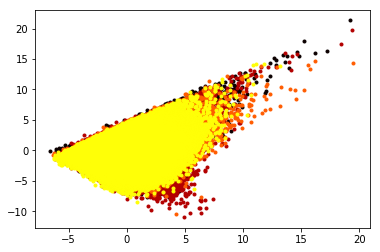

In [28]:
import matplotlib.pyplot as plt

import matplotlib.colors as colors
import matplotlib.cm as cmx


hot = plt.get_cmap('hot')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

for i in range(len(uniq)):
    indx = X['pathogen'] == uniq[i]
    plt.scatter(X_[indx,1], X_[indx,0], color=scalarMap.to_rgba(i), label=uniq[i], marker=".")

plt.show()